In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
df = pd.read_csv("CarPrice_Dirty.csv")

print("_______________________________")
print("Initial shape:", df.shape)
print("_______________________________")
print("Nulls per column:\n", df.isnull().sum())
print("_______________________________")
print("Duplicates:", df.duplicated().sum())
print("_______________________________")
print(df.describe())
print("_______________________________")

_______________________________
Initial shape: (1046, 9)
_______________________________
Nulls per column:
 Make               0
Model              0
Year               0
Engine Size        0
Mileage           70
Fuel Type         70
Transmission       0
Price             70
Notes           1046
dtype: int64
_______________________________
Duplicates: 46
_______________________________
              Year  Engine Size        Mileage          Price  Notes
count  1046.000000  1046.000000     976.000000     976.000000    0.0
mean   2010.677820     2.845889   99922.109631   26199.352926    NaN
std       6.291973     1.130557   62400.489815   13026.003266    NaN
min    2000.000000     1.000000      56.000000    6704.953524    NaN
25%    2005.000000     1.900000   45922.750000   21529.590597    NaN
50%    2011.000000     2.850000   96707.000000   25094.157094    NaN
75%    2016.000000     3.700000  153650.000000   28821.183438    NaN
max    2021.000000     8.000000  300000.000000  150000.0000

Preprocessing Stage

In [39]:
# Remove irrelevant column
if "Notes" in df.columns:
    df.drop(columns=["Notes"], inplace=True)

# Drop Model
df.drop(columns=['Model'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle garbage values represented as "unknown" with NaN
for col in ['Price', 'Mileage', 'Engine Size']:
    df[col] = df[col].replace("unknown", np.nan)
for col in ['Fuel Type', 'Transmission']:
    df[col] = df[col].replace("unknown", np.nan)

# Handle nulls with median/mode imputation
for col in ['Price', 'Mileage']:
    df[col] = df[col].fillna(df[col].median())

for col in ['Fuel Type', 'Transmission']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Handle outliers by removing rows with extreme values
df = df[df['Price'] < 100000]
df = df[df['Mileage'] < 200000]
df = df[df['Engine Size'] < 6.0]





Visualization Stage

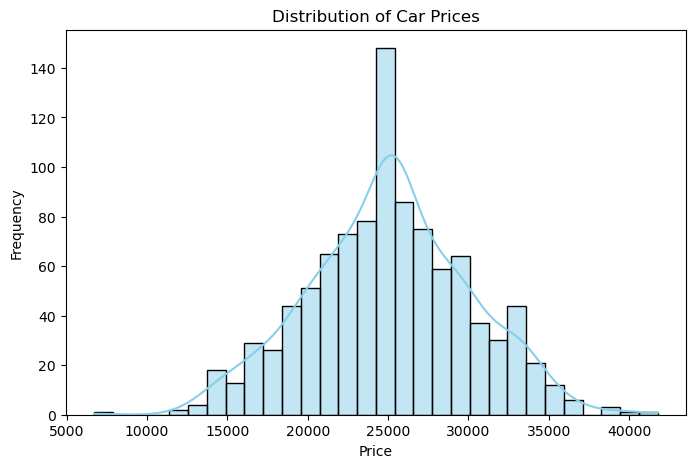

In [40]:
# Histogram of Price Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

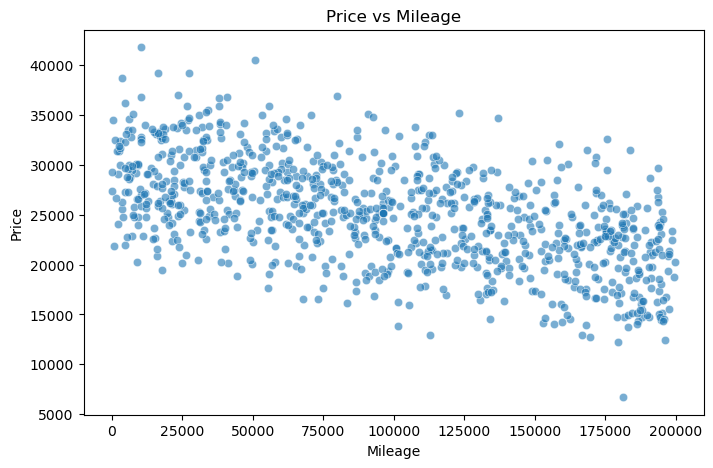

In [41]:
# Scatter Plot: Price vs Mileage

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Mileage'], y=df['Price'], alpha=0.6)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


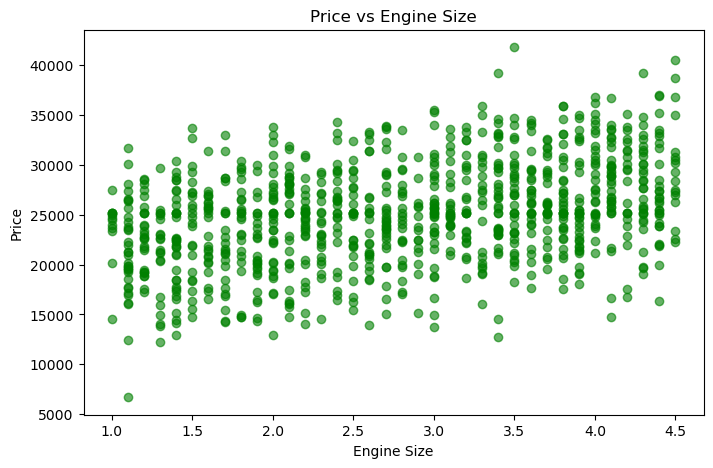

In [42]:
# Scatter Plot: Price vs Engine Size

plt.figure(figsize=(8,5))
plt.scatter(df['Engine Size'], df['Price'], alpha=0.6, color='green')
plt.title("Price vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

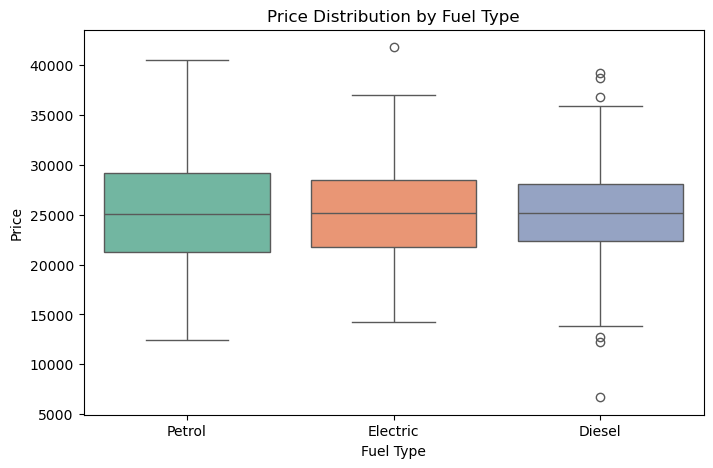

In [43]:
# Boxplot: Price by Fuel Type

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Fuel Type',
    y='Price',
    hue='Fuel Type',
    palette="Set2",
    legend=False
)
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

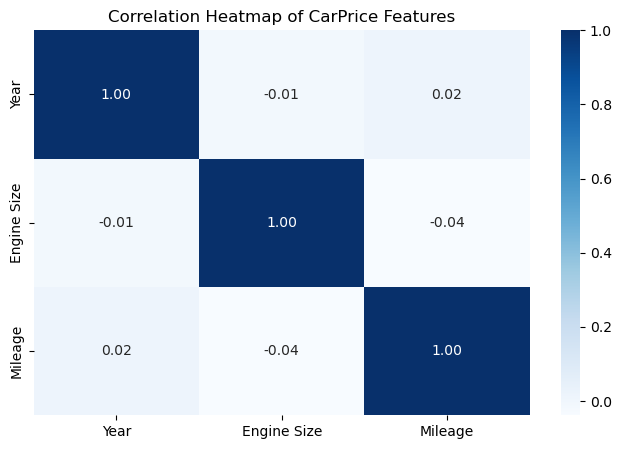

In [44]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Price',)  
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of CarPrice Features")
plt.show()

Model Stage

In [45]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Make','Fuel Type','Transmission'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
df[['Year','Engine Size','Mileage']] = scaler.fit_transform(df[['Year','Engine Size','Mileage']])

In [46]:
# Split data into features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [47]:
# Train model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Evaluate model
y_pred = model.predict(X_test)              

mse = mean_squared_error(y_test, y_pred)    # Mean Squared Error
r2_Score = r2_score(y_test, y_pred)         # R² score
rmse = np.sqrt(mse)                         # Root Mean Squared Error

print("R^2 Score:", r2_Score)
print("MSE:", mse)
print("RMSE:", rmse)


R^2 Score: 0.7830185997503187
MSE: 5620317.155632122
RMSE: 2370.7208092966416


In [ ]:
# Scatter plot illustrates how closely predicted prices align with actual values.
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()



SyntaxError: invalid syntax (2153634973.py, line 2)

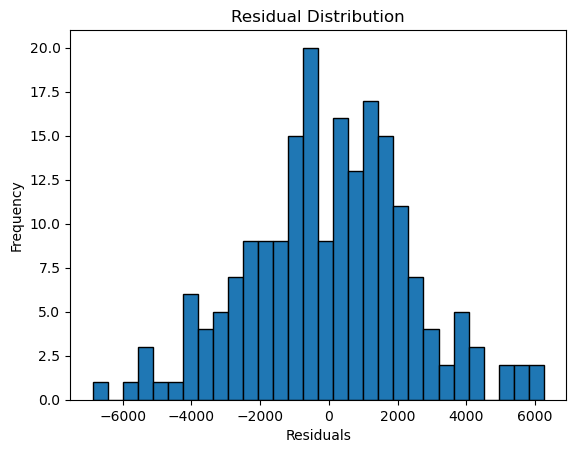

In [50]:
# Residual histogram evaluates error distribution and checks if residuals are centered around zero.

residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [51]:
# This code exports the trained model, scaler, and feature list for future use.


# import joblib


# joblib.dump(model, "car_price_model.pkl")
# joblib.dump(scaler, "scaler.pkl")
# joblib.dump(X.columns.tolist(), "features.pkl")

